In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Unsupervised dimensionality reduction via PCA



Eigenvalues 
 [4.68272277 2.5174937  1.44251124 0.95025687 0.91388156 0.70002767
 0.59696802 0.09544816 0.14241154 0.31659155 0.22087117 0.26741076
 0.25909606]


<BarContainer object of 13 artists>

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 0, 'Principal Component Index')

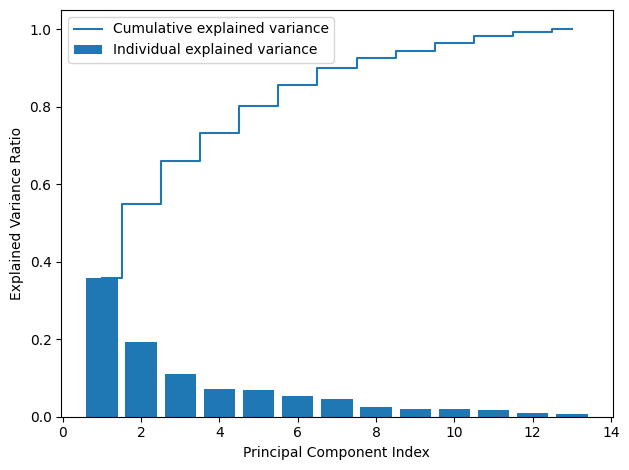

In [7]:
# We will start with 4 steps of PCA Algo
# 1. Standardize the data
# 2. Constructing the covariance matrix
# 3. Obtaining eigenvalues and eigenvectors of the covariance matrix
# 4. Sorting the eignevalues by decreasing order to rank the eigne vectors 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_wine = pd.read_csv(
                'https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/wine/wine.data',
                header=None
)

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 1. Standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 2. Create a covariance matrix
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)
# A vector consisting of 13 eigen values and corresponding 13 x 13 eignen  vectors
# stored as column in 13 x 13 dimensional matrix (eigen_vecs_)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, align='center', label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### Feature transformation



In [13]:
eigen_vecs[:, 0]

array([ 0.15763477, -0.25237011, -0.01662626, -0.23514225,  0.14285062,
        0.38989121,  0.42596901, -0.28675917,  0.30864294, -0.08886736,
        0.30119689,  0.37783572,  0.28836287])

In [16]:
# 1. select k eigen vectors which corresponds to k largest eigen values
# 2. Construct a projection matrix 'W' from the top "k" eigen vectors
# 3. Transform the d dimensional X matrix with W to obtain new k-dimensional feature space.

# Make the list of (eigenvalues, eigenvectors)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalues, eigenvectors) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# A 13x2 dimensional matrxi from top 2 eigenpairs
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n', w)

Matrix W: 
 [[ 0.15763477  0.49414675]
 [-0.25237011  0.1670862 ]
 [-0.01662626  0.33581955]
 [-0.23514225 -0.0230456 ]
 [ 0.14285062  0.2816766 ]
 [ 0.38989121  0.07164769]
 [ 0.42596901  0.00569565]
 [-0.28675917  0.04855187]
 [ 0.30864294  0.00589032]
 [-0.08886736  0.52633004]
 [ 0.30119689 -0.28399523]
 [ 0.37783572 -0.18136641]
 [ 0.28836287  0.3703045 ]]


array([2.18453092, 0.79011876])

Text(0.5, 0, 'PC 1')

Text(0, 0.5, 'PC 2')

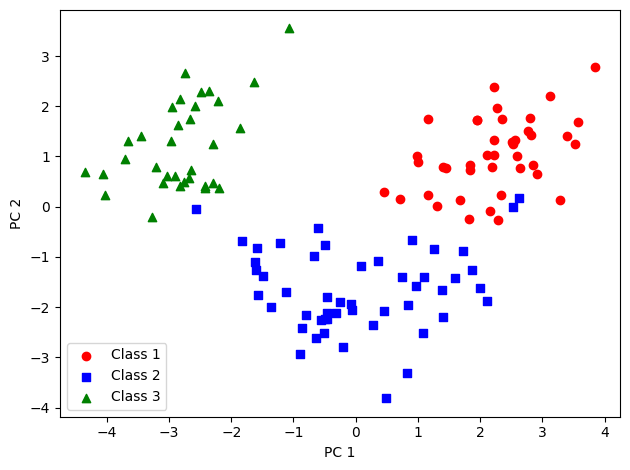

In [28]:
# Now we can transform the 2 dimensional
X_train_std[0].dot(w)
X_train_pca = X_train_std.dot(w)

# transform the 124 x 13 dimensional training dataset onto 2 PCA
# X` = XW

colors = ['r','b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1],
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

#### Principal Component Analysis in scikit-learn

In [32]:
from plot_decision_regions_script import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

# dimensionality reduction
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# fitting the logsitic regression model on the reduced dataset
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=1)

NameError: name 'np' is not defined